# Matplotlib Review

## Agenda

**Thought for the day**

*There is no better than adversity. Every defeat, every heartbreak, every loss, contains its own seed, its own lesson on how to improve your performance the next time.* – Malcolm X

1. Review Matplotlib lesson, exercises
2. Numpy Lesson
3. Numpy Exercises
4. This week: learn


## Lesson Review with New Data

### Histograms

- Histograms are often used in the data prep stage of the pipeline. 
- They are good for the discovery of a single variable
    - the distribution - skewed right or left, normally distributed ('bell curve'), uniformly distributed, etc. 
    - the range of values - wide or narrow range? can values be < 0? what is the max value? 
    - outliers - true outliers? data errors? 
- Box plots are often used for these types of discoveries, also. 

### Line & Scatterplots

- Line & scatter plots, as well as bar plots, and many, many others, are most commonly used for exploring the relationships between variables, and, as you would expect, are used in the exploration stage of the pipeline.  
- Line & Scatter Plots are used when your x and y variables are both numeric and ordered, while bar plots are used when you have one numeric and one categorical variable. 
- Color can be added on any of these as a third dimension, and one that represents a categorical variable. It can be used to create multiple lines representing categories or classes, or to identify points on a scatterplot as belonging to one category or class.   
- Size can be added as a third (or fourth) dimension to scatter plots to represent a numeric or ordered variable.  
- Line is best when x represents time.   
- Scatter is best when x is numeric, but doesn't represent time.   




### Prep Environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

### Get data

In [2]:
from pydataset import data

# look at the datasets
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


We will look at the sleep study and iris datasets. 

**Sleep Study**

Reaction times in a sleep deprivation study  

In [3]:
## Load the sleep study data
sleep = data('sleepstudy')

## peek into the dataset
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


**Takeaways**

- Reaction = Reaction time (duration)
- Days = Day number of deprivation
- Subject = Subject ID
- We can use `Days` as x because it is related to date/time, and date/time should always be on the x axis.
- We can use `Reaction` as our y becuase, well, `Days` is x, and it represents a measure, in this case duration. 
- Becuase `Subject` is a category (the number doesn't actually mean anything, i.e. order doesn't matter, and the distance between one and another means nothing), we can possibly represent this in our plots using color. 

In [4]:
# create x and y variables

x_day = sleep['Days']

y_rxn = sleep['Reaction']

# take a look at what we have...

type(x_day)

pandas.core.series.Series

In [5]:
x_day.head()

1    0
2    1
3    2
4    3
5    4
Name: Days, dtype: int64

Each one of these is a pandas series, which we will learn about later this week. Just as we gave our plotting functions (.plot(), .scatter()) list objects for x and y in the lesson, we can also give them series objects. 

**Iris**

Contains iris species along with sample sepal & petal measurements. 

In [6]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Takeaways**

- Sepal.Length: Length of sepal of sample iris, use as y (because length)
- Sepal.Width: Width of sepal of sample iris, use as x (because width)
- Petal.Length: Length of petal of sample iris, y2
- Petal.Width: Width of petal of sample iris, x2
- Species: Iris species, use as z (because categorical)

### Line Plots

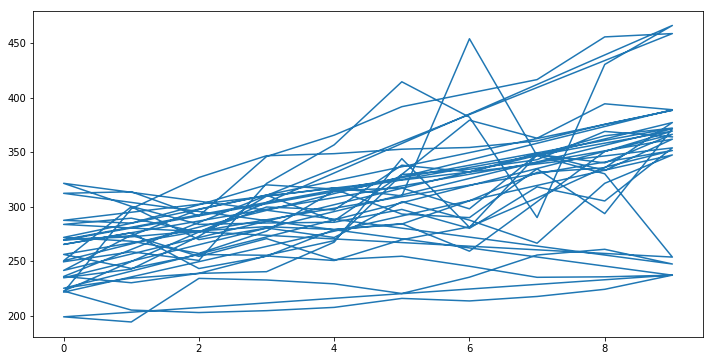

In [8]:
plt.figure(figsize = (12, 6))

plt.plot(x_day, y_rxn)
plt.show()

In [14]:
day_308 = sleep[sleep.Subject == 308].Days
# print(day_308)

rxn_308 = sleep[sleep.Subject == 308].Reaction
# print(rxn_308)

day_309 = sleep[sleep.Subject == 309].Days
rxn_309 = sleep[sleep.Subject == 309].Reaction

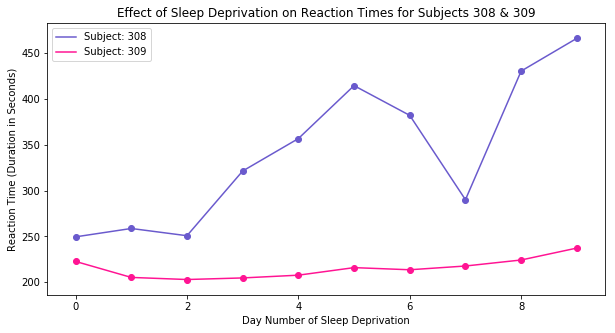

In [28]:
plt.figure(figsize = (10, 5))
plt.plot(day_308, rxn_308, c='slateblue', label='Subject: 308')
plt.plot(day_309, rxn_309, c='deeppink', label='Subject: 309')
plt.legend()
plt.scatter(day_309, rxn_309, c='deeppink')
plt.scatter(day_308, rxn_308, c='slateblue')
plt.title('Effect of Sleep Deprivation on Reaction Times for Subjects 308 & 309')
plt.xlabel('Day Number of Sleep Deprivation')
plt.ylabel('Reaction Time (Duration in Seconds)')
plt.show()

### Scatterplots

In [32]:
iris.Species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

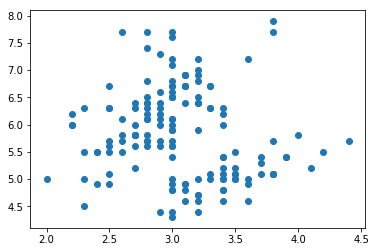

In [34]:
iris.head()

x = iris['Sepal.Width']
y = iris['Sepal.Length']

plt.scatter(x, y)
plt.show()

In [35]:
# get x and y for virginica
vir_w = iris[iris['Species'] == 'virginica']['Sepal.Width']
vir_l = iris[iris['Species'] == 'virginica']['Sepal.Length']

# get x and y for versicolor
ver_w = iris[iris['Species'] == 'versicolor']['Sepal.Width']
ver_l = iris[iris['Species'] == 'versicolor']['Sepal.Length']

# get x and y for setosa
set_w = iris[iris['Species'] == 'setosa']['Sepal.Width']
set_l = iris[iris['Species'] == 'setosa']['Sepal.Length']

Text(0, 0.5, 'Sepal Length')

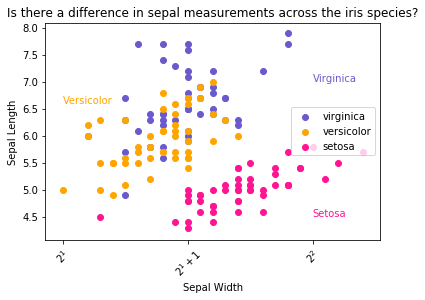

In [51]:
plt.scatter(vir_w, vir_l, c='slateblue', label='virginica')
plt.scatter(ver_w, ver_l, c='orange', label='versicolor')
plt.scatter(set_w, set_l, c='deeppink', label='setosa')

# plt.ylim(0, 8)
# plt.xlim(0, 5)

plt.xticks([2, 3, 4], ['$2^{1}$', '$2^{1}+1$', '$2^{2}$'], rotation=45)
plt.text(4, 4.5, 'Setosa', color='deeppink')
plt.text(4, 7, 'Virginica', color='slateblue')
plt.text(2, 6.6, 'Versicolor', color='orange')
plt.legend(loc='right')
plt.title('Is there a difference in sepal measurements across the iris species?')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

## Histograms

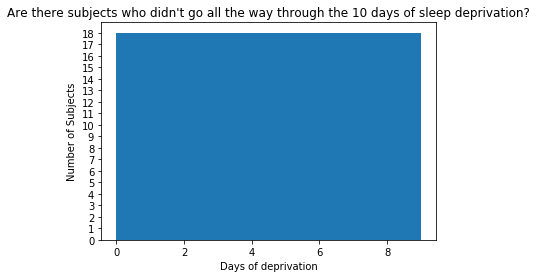

In [60]:
# histogram of days of deprivation
plt.hist(x_day)
plt.title("Are there subjects who didn't go all the way through the 10 days of sleep deprivation?")
plt.xlabel('Days of deprivation')
plt.ylabel('Number of Subjects')
plt.yticks(list(range(0, 19)))
plt.show()

Text(0, 0.5, 'Number of Subjects')

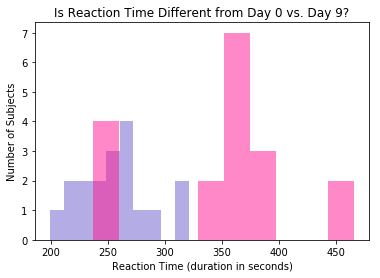

In [66]:
# histogram of reaction time
# plt.hist(y_rxn)
plt.hist(sleep[sleep.Days == 0]['Reaction'], color='slateblue', alpha=.5)
plt.hist(sleep[sleep.Days == 9]['Reaction'], color='deeppink', alpha=.5)
plt.title('Is Reaction Time Different from Day 0 vs. Day 9?')
plt.xlabel('Reaction Time (duration in seconds)')
plt.ylabel('Number of Subjects')

## Exercises

Plot $y = x^{2} - x + 2$. 

- Generate the x and y points.
- Annotate the origin.  

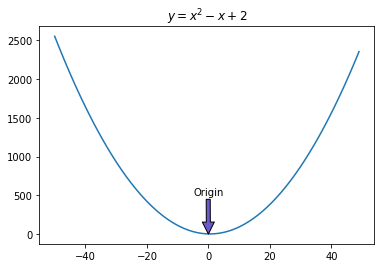

In [73]:
x = list(range(-50, 50))

# generate our y values
y = [(n ** 2 - n + 2) for n in x]

plt.plot(x, y)

# title
plt.title('$y = x^{2} - x + 2$')

# annotate the origin
plt.annotate('Origin', xy=(0, 0), xytext=(-5, 500), arrowprops={'facecolor': 'slateblue'})

plt.show()

Plot $y = \sqrt{x}$ 

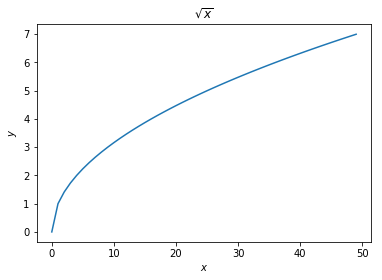

In [74]:
from math import sqrt

# x cannot be less than 0, due to square root
x = list(range(0, 50))

# generate y
y = [sqrt(n) for n in x]

plt.plot(x, y)
plt.title('$\sqrt{x}$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

Plot $y = x^{3}$

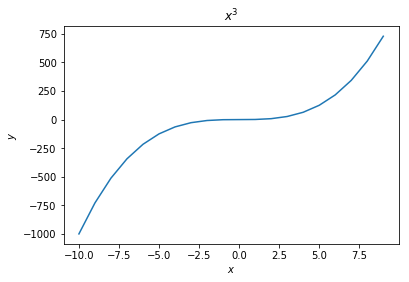

In [78]:
# range of x
x = list(range(-10, 10))

# generate y
y = [n ** 3 for n in x]

plt.plot(x, y)
plt.title('$x^{3}$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

Plot $y = 2^{x}$ 

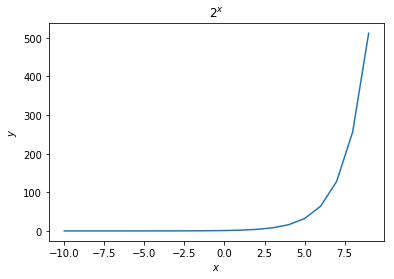

In [79]:
# set range for x
x = list(range(-10, 10))

# generate y
y = [2 ** n for n in x]

# plot x and y
plt.plot(x, y)
plt.title('$2^{x}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

3. Combine the figures you created in the last step into one large figure with 3 subplots.  

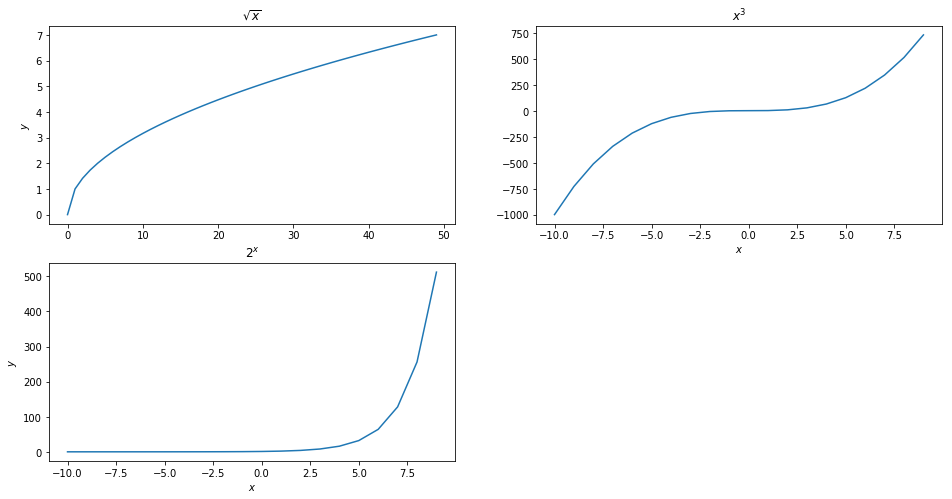

In [81]:
plt.figure(figsize = (16, 8))

# plot $\sqrt{x}$

plt.subplot(2, 2, 1)

# x cannot be less than 0, due to square root
x = list(range(0, 50))

# generate y
y = [sqrt(n) for n in x]

plt.plot(x, y)
plt.title('$\sqrt{x}$')
plt.ylabel('$y$')


# plot $x^{3}$

plt.subplot(2, 2, 2) 

# range of x
x = list(range(-10, 10))

# generate y
y = [n ** 3 for n in x]

plt.plot(x, y)
plt.title('$x^{3}$')
plt.xlabel('$x$')

# plot $2^{x}$

plt.subplot(2, 2, 3) 

# set range for x
x = list(range(-10, 10))

# generate y
y = [2 ** n for n in x]

# plot x and y
plt.plot(x, y)
plt.title('$2^{x}$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

4. Comine the figures you created in the last step into one figure where each of the 4 equations has a different color for the points. Be sure to include a legend.  

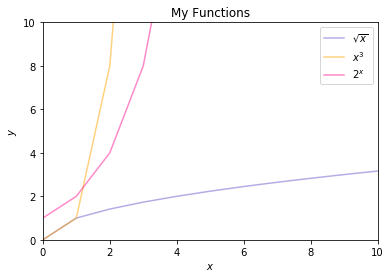

In [87]:
x = list(range(0, 25))

# generate y for each fucntion
y1 = [sqrt(n) for n in x]
y2 = [n**3 for n in x]
y3 = [2**n for n in x]

plt.plot(x, y1, c='slateblue', label='$\sqrt{x}$', alpha=.5)
plt.plot(x, y2, c='orange', label='$x^{3}$', alpha=.5)
plt.plot(x, y3, c='deeppink', label='$2^{x}$', alpha=.5)
plt.ylim(0, 10)
plt.xlim(0, 10)

plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('My Functions')
plt.legend()

plt.show()